In [1]:
import ROOT as r

Welcome to JupyROOT 6.08/02


In [2]:
def draw():
    r.gROOT.FindObject("c1").Update()
    r.gROOT.FindObject("c1").Draw()
def logy(dolog=True):
    r.gROOT.FindObject("c1").SetLogy(dolog)

In [12]:
w = r.RooWorkspace()
w.factory("myy[105,160]")

w.factory("n_bg_exp[1000]")
w.factory("n_sig_exp[100]")

w.factory("Gaussian::constr_egr(theta_egr[0,-5,5],0,1)")
w.factory("Gaussian::constr_egs(theta_egs[0,-5,5],0,1)")

w.factory("prod::n_bg(mu_bg[1,0,10], n_bg_exp)")
w.factory("Exponential::pdf_bg(myy,b[-0.05])")

w.factory("expr::n_sig('mu_sig * n_sig_exp * (1+0.1*theta_egr) * (1-0.15*theta_egs)', mu_sig[1,0,10], n_sig_exp, theta_egr, theta_egs)")

w.factory("expr::m0('m_H * (1 + 0.005 * theta_egs)', m_H[125], theta_egs)")

w.factory("expr::sigma0('sigma0_exp * (1 - 0.10 * theta_egr)', sigma0_exp[3], theta_egr)")

w.factory("Gaussian::pdf_sig(myy,m0,sigma0)")

w.factory("SUM::model(n_bg * pdf_bg, n_sig * pdf_sig)")

w.factory("PROD::model_constr(model, constr_egr, constr_egs)")

w.defineSet("nuisanceParams", "theta_egr,theta_egs")

False

In [13]:
myy = w.obj("myy")
model = w.obj("model")
theta_egr = w.obj("theta_egr")
theta_egs = w.obj("theta_egs")

## vary EG scale

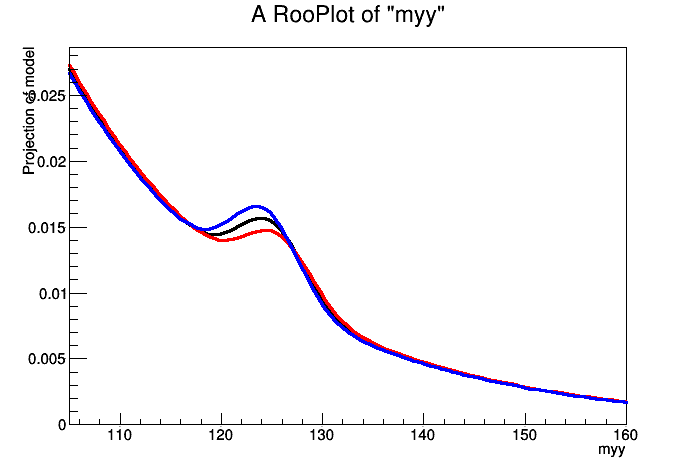

In [16]:
frame = myy.frame()

theta_egs.setVal(0)
model.plotOn(frame, r.RooFit.LineColor(r.kBlack))
theta_egs.setVal(1)
model.plotOn(frame, r.RooFit.LineColor(r.kRed))
theta_egs.setVal(-1)
model.plotOn(frame, r.RooFit.LineColor(r.kBlue))
theta_egs.setVal(0)
frame.Draw()
draw()

## vary EG res

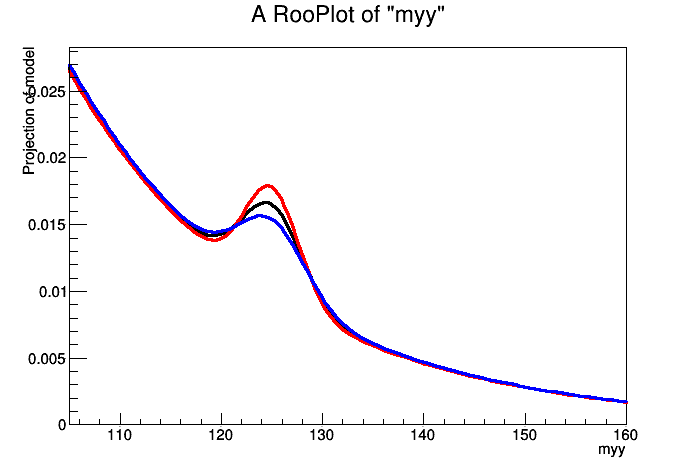

In [17]:
frame = myy.frame()

theta_egr.setVal(0)
model.plotOn(frame, r.RooFit.LineColor(r.kBlack))
theta_egr.setVal(1)
model.plotOn(frame, r.RooFit.LineColor(r.kRed))
theta_egr.setVal(-1)
model.plotOn(frame, r.RooFit.LineColor(r.kBlue))
theta_egr.setVal(0)
frame.Draw()
draw()

In [18]:
ds = model.generate(r.RooArgSet(myy), w.obj("n_bg_exp").getVal() + w.obj("n_sig_exp").getVal())

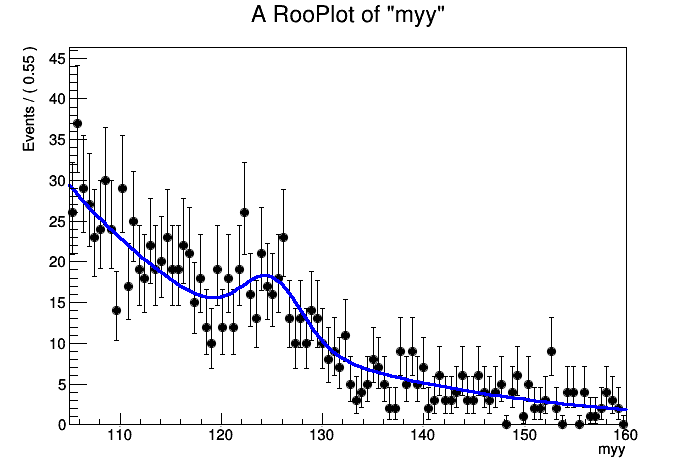

In [19]:
frame = myy.frame()
ds.plotOn(frame)
model.plotOn(frame)
frame.Draw()
draw()

In [21]:
fit_result = model.fitTo(ds, r.RooFit.Constrain(w.set("nuisanceParams")), r.RooFit.Save())

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (pdf_bg)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdf_sig)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mu_bg        1.00000e+00  5.00000e-01    0.00000e+00  1.00000e+01
     2 mu_sig       1.00000e+00  5.00000e-01    0.00000e+00  1.00000e+01
     3 theta_egr    0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     4 theta_egs    0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 


  RooFitResult: minimized FCN value: -2495.55, estimated distance to minimum: 2.28475e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                 mu_bg    1.0113e+00 +/-  3.77e-02
                mu_sig    7.6398e-01 +/-  3.21e-01
             theta_egr    7.7399e-01 +/-  2.22e+00
             theta_egs   -5.1349e-01 +/-  1.14e+00



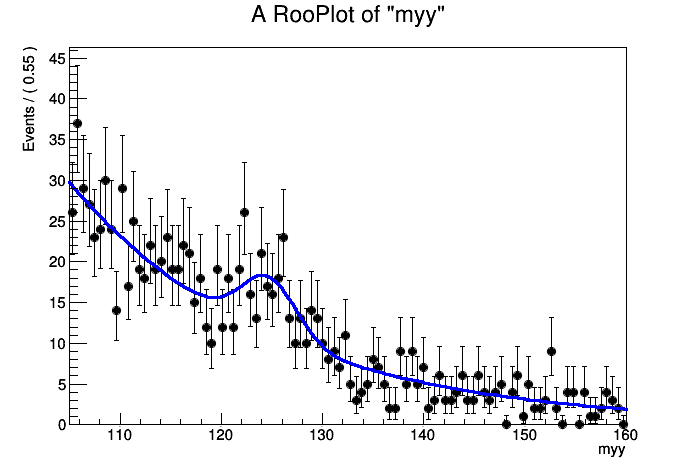

In [22]:
frame = myy.frame()
ds.plotOn(frame)
model.plotOn(frame)
frame.Draw()
draw()
fit_result.Print()